In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm_notebook

## Задача XOR
Сформируем обучающую выборку

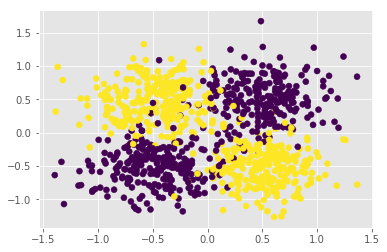

In [2]:
np.random.seed(2)
N = 10000
x_1 = np.random.randint(0, 2, N)
x_2 = np.random.randint(0, 2, N)
y = x_1 ^ x_2; y.shape=(N,1)
x_1 = x_1.astype(np.float32) + np.random.normal(0, 0.3, N) - 0.5
x_2 = x_2.astype(np.float32) + np.random.normal(0, 0.3, N) - 0.5
plt.scatter(x_1[:1000], x_2[:1000], c = y[:1000])
plt.show()

### Граф вычислений и обучение сети
Многослойный персептрон с двумя скрытыми слоями 

In [3]:
batch_size = 1000
X_tensor = tf.placeholder(dtype=tf.float32, shape=(None, 2))
Y_tensor = tf.placeholder(dtype=tf.float32, shape=(None, 1))

In [4]:
hidden_1_size = 8
hidden_2_size = 1

W_1 = tf.Variable(initial_value=tf.random_normal(shape=(2, hidden_1_size), mean=0, stddev=1), dtype=tf.float32, name="weigths")
Bias_1 = tf.Variable(initial_value=tf.random_normal(shape=(1,hidden_1_size), mean=0.0, stddev=1.0), dtype=tf.float32, name="bias")

H_1 = tf.nn.relu(tf.matmul(X_tensor, W_1) + Bias_1)

W_2 = tf.Variable(initial_value=tf.random_normal(shape=(hidden_1_size, hidden_2_size), mean=0.0, stddev=1.0), dtype=tf.float32, name="weigths_2")
Bias_2 = tf.Variable(initial_value=tf.random_normal(shape=(1, hidden_2_size), mean=0.0, stddev=1.0), dtype=tf.float32, name="bias_2")

#H_2 = tf.nn.relu(tf.matmul(H_1, W_2) + Bias_2)
#
#W_3 = tf.Variable(initial_value=tf.random_normal(shape=(hidden_2_size, 1), mean=0.0, stddev=1.0), dtype=tf.float32, name="weigths_3")
#Bias_3 = tf.Variable(initial_value=tf.random_normal(shape=(1, 1), mean=0.0, stddev=1.0), dtype=tf.float32, name="bias_3")

out = tf.matmul(H_1, W_2) + Bias_2

pred = tf.nn.sigmoid(out)

P = Y_tensor * tf.log(pred) + (1-Y_tensor)*tf.log(1-pred)

loss = tf.reduce_mean(-P)

loss_reg = loss # + 0.3*tf.reduce_sum(W_1**2) + 0.3*tf.reduce_sum(W_2**2) + 0.3*tf.reduce_sum(W_3**2)

optimizer = tf.train.AdamOptimizer(0.03).minimize(loss_reg)

### Обучение

In [5]:
errors = []
epochs = 50
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for ep in range(epochs):
        for i in tqdm_notebook(range(N // batch_size), leave=False):
            batch = np.column_stack([x_1[i*batch_size:(i+1)*batch_size], x_2[i*batch_size:(i+1)*batch_size]])
            y_batch = y[i*batch_size:(i+1)*batch_size]; y_batch.shape=(batch_size,1)
            _, l, P_  = sess.run([optimizer, loss, pred], {X_tensor: batch, Y_tensor: y_batch})
        errors.append(l)
        
        # Данные для теста
        x1, x2 = np.meshgrid(np.linspace(-1,1,20),np.linspace(-1,1,20))
        batch = np.column_stack([x2.flatten(),x1.flatten()])
        pr = sess.run([pred], {X_tensor: batch})

### Результаты
Посмотрим как наша сеть классифицирует точки на плоскости

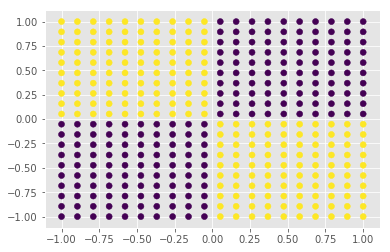

In [6]:
pr_label = np.array(pr) > 0.5
plt.scatter(x1, x2, c=pr_label)
plt.show()

### График функции потерь на обучении

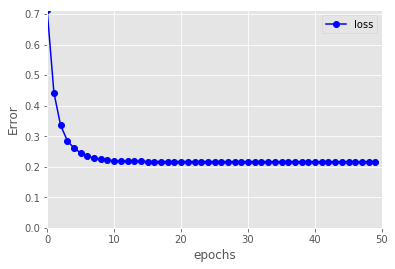

In [7]:
plt.plot(errors, '-o', c='b', label='loss')
plt.ylabel('Error')
plt.xlabel('epochs')
plt.xlim(0,len(errors))
plt.ylim(0, max(errors))
plt.legend()
plt.show()